In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import seaborn as sns
from tqdm.notebook import tqdm

In [2]:
# Path to your .pkl file
file_path = 'D:/Waffer Data/WM811K.pkl'

# Open and load the data from the file
with open(file_path, 'rb') as file:
    data = pickle.load(file)

print(data)

        dieSize failureType   lotName trainTestLabel  waferIndex  \
0        1683.0        none      lot1       Training         1.0   
1        1683.0        none      lot1       Training         2.0   
2        1683.0        none      lot1       Training         3.0   
3        1683.0        none      lot1       Training         4.0   
4        1683.0        none      lot1       Training         5.0   
...         ...         ...       ...            ...         ...   
811452    600.0   Edge-Ring  lot47542           Test        23.0   
811453    600.0    Edge-Loc  lot47542           Test        24.0   
811454    600.0   Edge-Ring  lot47542           Test        25.0   
811455    600.0      [0, 0]  lot47543         [0, 0]         1.0   
811456    600.0      [0, 0]  lot47543         [0, 0]         2.0   

                                                 waferMap  
0       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
1       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
2  

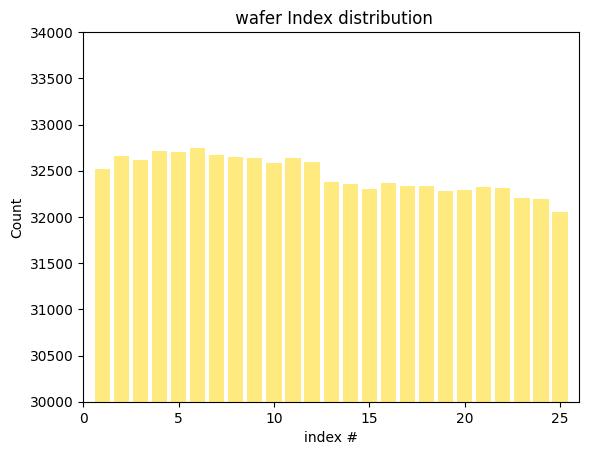

In [3]:
df = pd.DataFrame(data)


uni_Index=np.unique(df.waferIndex, return_counts=True)
plt.bar(uni_Index[0],uni_Index[1], color='gold', align='center', alpha=0.5)
plt.title(" wafer Index distribution")
plt.xlabel("index #")
plt.ylabel("Count")
plt.xlim(0,26)
plt.ylim(30000,34000)
plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   dieSize         811457 non-null  float64
 1   failureType     811457 non-null  object 
 2   lotName         811457 non-null  object 
 3   trainTestLabel  811457 non-null  object 
 4   waferIndex      811457 non-null  float64
 5   waferMap        811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


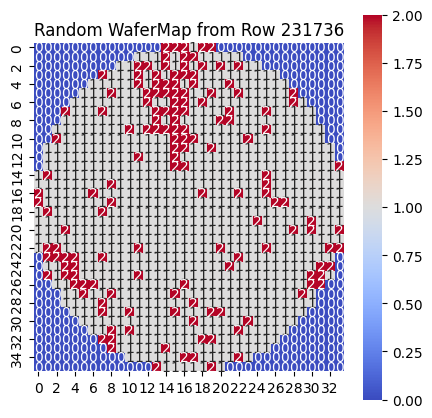

In [5]:
# Select a random row
random_row = df.sample(n=1).iloc[0]

# Extract the waferMap matrix from the selected row
wafer_map = random_row['waferMap']

# Display the waferMap matrix using seaborn heatmap or matplotlib
plt.figure(figsize=(5, 5))
sns.heatmap(wafer_map, cmap='coolwarm', square=True, annot=True, cbar=True)

# Add title showing which row was randomly selected
plt.title(f'Random WaferMap from Row {random_row.name}')
plt.show()

In [6]:
def find_dim(x):
    dim0=np.size(x,axis=0)
    dim1=np.size(x,axis=1)
    return dim0,dim1
df['waferMapDim']=df.waferMap.apply(find_dim)
df.sample(5)

,dieSize,failureType,lotName,trainTestLabel,waferIndex,waferMap,waferMapDim
799977,562.0,none,lot47074,Test,12.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2,...","(29, 26)"
275905,2489.0,"[0, 0]",lot16976,"[0, 0]",15.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","(59, 54)"
342856,1507.0,"[0, 0]",lot20541,"[0, 0]",21.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","(44, 44)"
457917,712.0,"[0, 0]",lot28222,"[0, 0]",9.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2,...","(32, 29)"
66380,5342.0,"[0, 0]",lot5048,"[0, 0]",22.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","(89, 76)"


In [7]:
max(df.waferMapDim), min(df.waferMapDim)

((300, 202), (6, 21))

In [8]:
uni_waferDim=np.unique(df.waferMapDim, return_counts=True)
uni_waferDim[0].shape[0]

632

In [9]:
print(df['failureType'].apply(type).value_counts())  # Check the data types in the 'failureType' column
print(df['trainTestLabel'].apply(type).value_counts())  # Check the data types in the 'trainTestLabel' column

failureType
<class 'numpy.ndarray'>    638507
<class 'str'>              172950
Name: count, dtype: int64
trainTestLabel
<class 'numpy.ndarray'>    638507
<class 'str'>              172950
Name: count, dtype: int64


In [10]:
# Check if a row has either or both failure types as ndarray
def check_ndarray(x):
    # Check if the value is a list or array, return True if it is
    if isinstance(x, np.ndarray) or (isinstance(x, list) and any(isinstance(i, np.ndarray) for i in x)):
        return True
    return False

# Apply the check and filter rows
rows_with_ndarray = df[df['failureType'].apply(check_ndarray)]

# Apply the check and get a boolean mask for rows with ndarray
mask = df['failureType'].apply(check_ndarray)

# Print the number of rows that satisfy the condition
print(f"Number of rows with either one or both failure types as ndarray: {len(rows_with_ndarray)}")

# Remove the rows where failureType contains ndarray
df_cleaned = df[~mask]

# Print the number of rows that were removed
print(f"Number of rows removed: {mask.sum()}")

Number of rows with either one or both failure types as ndarray: 638507
Number of rows removed: 638507


In [11]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172950 entries, 0 to 811454
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   dieSize         172950 non-null  float64
 1   failureType     172950 non-null  object 
 2   lotName         172950 non-null  object 
 3   trainTestLabel  172950 non-null  object 
 4   waferIndex      172950 non-null  float64
 5   waferMap        172950 non-null  object 
 6   waferMapDim     172950 non-null  object 
dtypes: float64(2), object(5)
memory usage: 10.6+ MB


In [12]:
duplicates = df_cleaned[df_cleaned.duplicated(subset=['dieSize', 'failureType','waferIndex','lotName'])].sum()

duplicates

dieSize           0.0
failureType         0
lotName             0
trainTestLabel      0
waferIndex        0.0
waferMap            0
waferMapDim         0
dtype: object

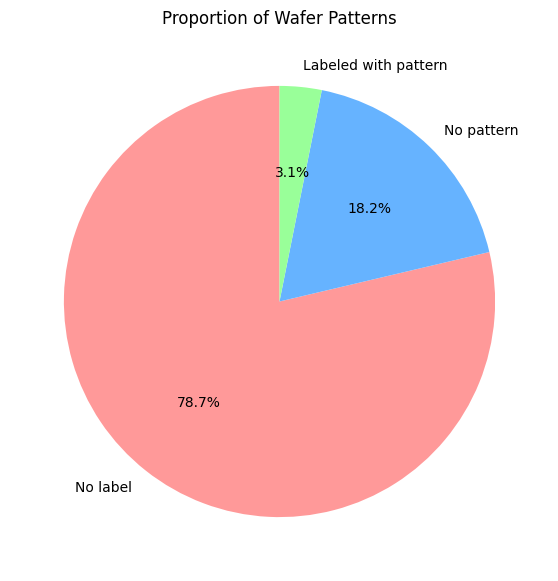

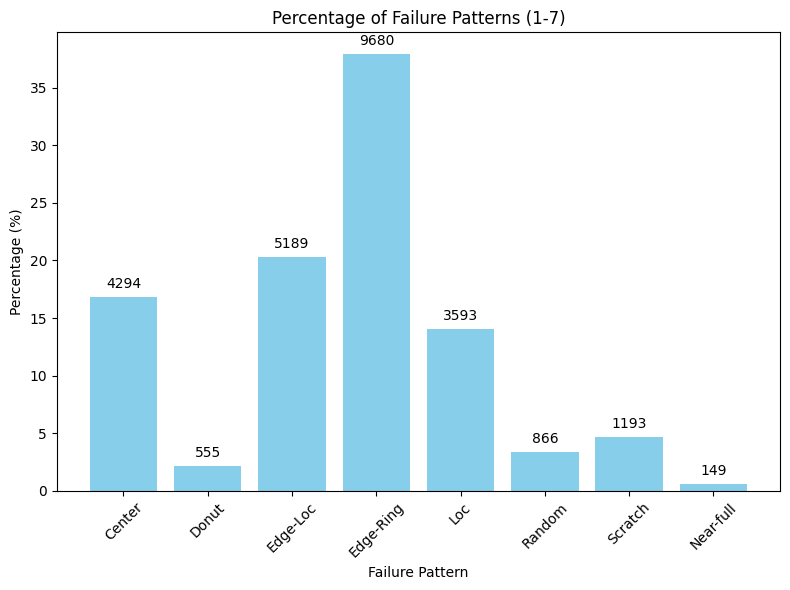

In [13]:
# Mapping of failure types to numerical values
mapping_type = {'Center': 0, 'Donut': 1, 'Edge-Loc': 2, 'Edge-Ring': 3, 
                'Loc': 4, 'Random': 5, 'Scratch': 6, 'Near-full': 7, 'none': 8, 'Unknown' : 9}

# Classify the rows into 'No label', 'Pattern 1-7', and 'No pattern'
def classify_failure(x):
    if isinstance(x, np.ndarray) and np.array_equal(x, [0, 0]):
        return 'No label'
    elif isinstance(x, str) and mapping_type.get(x) in range(0, 8):
        return 'Labeled with pattern'
    elif isinstance(x, str) and mapping_type.get(x) == 8:
        return 'No pattern'

# Apply the classification to the failureType column
df['failure_class'] = df['failureType'].apply(classify_failure)

# Step 1: Plot the Pie Chart
labels_count = df['failure_class'].value_counts()

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(labels_count, labels=labels_count.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Proportion of Wafer Patterns')
plt.show()

# Step 2: Plot the Bar Chart for Pattern 1-7 with Percentages
# Filter the patterns 1-7 and calculate their counts
pattern_0_to_7 = df[df['failure_class'] == 'Labeled with pattern']['failureType'].map(mapping_type)

# Count occurrences of patterns 1-7
pattern_0_to_7_count = pattern_0_to_7.value_counts().sort_index()

# Calculate percentages
total_labels = pattern_0_to_7_count.sum()  # Total number of 1-7 patterns
pattern_0_to_7_percent = (pattern_0_to_7_count / total_labels) * 100

# Create the bar chart with percentages
plt.figure(figsize=(8, 6))
bars = plt.bar(pattern_0_to_7_percent.index, pattern_0_to_7_percent, color='skyblue')

# Annotate the bars with the raw counts
for bar, count in zip(bars, pattern_0_to_7_count):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{count}', ha='center', va='bottom')

# Set the labels and title
plt.title('Percentage of Failure Patterns (1-7)')
plt.xlabel('Failure Pattern')
plt.ylabel('Percentage (%)')

# Customize x-axis ticks
plt.xticks(ticks=range(0, 8), labels=['Center','Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Random', 'Scratch', 'Near-full'], rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Function to check if the list is [0, 0] and return 'Unknown'
def replace_zero_zero(x):
    # Check if the element is exactly [0, 0]
    if isinstance(x, (list, np.ndarray)) and np.array_equal(x, [0, 0]):
        return 'Unknown'
    return x

# Step 1: Create a new DataFrame df_modified to keep the original df intact
df_modified = df.copy()

# Step 2: Apply the function to both 'failureType' and 'trainTestLabel' columns in df_modified
df_modified['failureType'] = df_modified['failureType'].apply(replace_zero_zero)
df_modified['trainTestLabel'] = df_modified['trainTestLabel'].apply(replace_zero_zero)

# Print the modified DataFrame (df_modified)
print("Modified DataFrame (df_modified):")
print(df_modified)


Modified DataFrame (df_modified):
        dieSize failureType   lotName trainTestLabel  waferIndex  \
0        1683.0        none      lot1       Training         1.0   
1        1683.0        none      lot1       Training         2.0   
2        1683.0        none      lot1       Training         3.0   
3        1683.0        none      lot1       Training         4.0   
4        1683.0        none      lot1       Training         5.0   
...         ...         ...       ...            ...         ...   
811452    600.0   Edge-Ring  lot47542           Test        23.0   
811453    600.0    Edge-Loc  lot47542           Test        24.0   
811454    600.0   Edge-Ring  lot47542           Test        25.0   
811455    600.0     Unknown  lot47543        Unknown         1.0   
811456    600.0     Unknown  lot47543        Unknown         2.0   

                                                 waferMap waferMapDim  \
0       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...    (45, 48)   
1  

In [15]:
df_modified['failureType'].unique()

array(['none', 'Loc', 'Unknown', 'Edge-Loc', 'Center', 'Edge-Ring',
       'Scratch', 'Random', 'Near-full', 'Donut'], dtype=object)

In [16]:
# Function to check if the list is [0, 0] and return 'Unknown'
def replace_zero_zero(x):
    if isinstance(x, (list, np.ndarray)) and np.array_equal(x, [0, 0]):
        return 'Unknown'
    return x

# Apply the replacement function to 'failureType' column in df_modified
df_modified['failureType'] = df_modified['failureType'].apply(replace_zero_zero)

# Step 1: Select a random lotName from df_modified
random_lot = df_modified['lotName'].sample(n=1).values[0]

# Step 2: Filter the DataFrame to get all rows (wafer indices) from the selected lot
lot_df = df_modified[df_modified['lotName'] == random_lot]

# Step 3: Display the failureType for each index in the selected lot
print(f"Randomly selected lot: {random_lot}")
print("Failure types in this lot:")

for idx, row in lot_df.iterrows():
    print(f"Index {row['waferIndex']}: Failure Type = {row['failureType']}")


Randomly selected lot: lot44900
Failure types in this lot:
Index 1.0: Failure Type = none
Index 2.0: Failure Type = none
Index 3.0: Failure Type = none
Index 4.0: Failure Type = none
Index 5.0: Failure Type = none
Index 6.0: Failure Type = none
Index 7.0: Failure Type = none
Index 8.0: Failure Type = none
Index 9.0: Failure Type = none
Index 10.0: Failure Type = none
Index 11.0: Failure Type = none
Index 12.0: Failure Type = none
Index 13.0: Failure Type = none
Index 14.0: Failure Type = Edge-Loc
Index 15.0: Failure Type = none
Index 16.0: Failure Type = none
Index 17.0: Failure Type = none
Index 18.0: Failure Type = none
Index 19.0: Failure Type = none
Index 20.0: Failure Type = none
Index 21.0: Failure Type = none
Index 22.0: Failure Type = none
Index 23.0: Failure Type = none
Index 24.0: Failure Type = none
Index 25.0: Failure Type = none


In [17]:
mapping_type_reverse = {0: 'Center', 1: 'Donut', 2: 'Edge-Loc', 3: 'Edge-Ring', 4: 'Loc', 5: 'Random', 6: 'Scratch', 7: 'Near-full', 8: 'none', 9: 'Unknown'}


# UI Components
pattern_selector = widgets.Dropdown(
    options=[(mapping_type_reverse[i], i) for i in range(10)],  # from 0 to 9
    value=0,
    description='Pattern:',
)

sample_size_slider = widgets.IntSlider(
    value=5,
    min=1,
    max=100,
    step=1,
    description='Samples:',
    continuous_update=False
)

random_toggle = widgets.Checkbox(
    value=False,
    description='Random Sample',
    disabled=False
)

generate_button = widgets.Button(
    description='Visualize',
    button_style='success',
    icon='eye'
)

In [18]:
output_area = widgets.Output()

In [19]:
# Function to visualize the selected wafer maps from the cleaned DataFrame
def visualize_pattern(b):
    # Clear previous output
    with output_area:
        clear_output(wait=True)
        
        # Get user inputs
        selected_pattern = pattern_selector.value
        num_samples = sample_size_slider.value
        random_sample = random_toggle.value
        
        # Filter the DataFrame based on the selected pattern (from the cleaned DataFrame)
        filtered_df = df_modified[df_modified['failureType'].map(mapping_type) == selected_pattern]
        
        # If random sampling is requested
        if random_sample:
            filtered_df = filtered_df.sample(n=num_samples)
        else:
            filtered_df = filtered_df.head(num_samples)
        
        # Determine number of rows needed based on 7 plots per row
        num_cols = 7
        num_rows = int(np.ceil(num_samples / num_cols))
        
        # Create subplots with the required number of rows and columns
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
        axes = axes.flatten()  # Flatten the axes array for easy indexing
        
        for i, (idx, row) in tqdm(enumerate(filtered_df.iterrows()), total=num_samples, desc="Plotting Wafer Maps"):
            wafer_map = row['waferMap']  # Assuming 'waferMap' contains a 2D array
            wafer_map_dim = wafer_map.shape  # Get the dimensions of the wafer map (rows, columns)
            
            sns.heatmap(wafer_map, ax=axes[i], cmap='coolwarm', cbar=False, square=True)
            axes[i].set_title(f'Sample {i+1} - Dim: {wafer_map_dim[0]}x{wafer_map_dim[1]}')
            axes[i].set_xticks([])
            axes[i].set_yticks([])
        
        # Turn off empty axes (in case num_samples is not a multiple of num_cols)
        for j in range(i+1, len(axes)):
            axes[j].axis('off')
        
        plt.suptitle(f'Selected Pattern: {mapping_type_reverse[selected_pattern]} (n={num_samples})')
        plt.tight_layout()
        plt.show()

In [20]:
# Link the button to the visualization function
generate_button.on_click(visualize_pattern)

In [21]:
# Display the UI
display(widgets.VBox([pattern_selector, sample_size_slider, random_toggle, generate_button, output_area]))

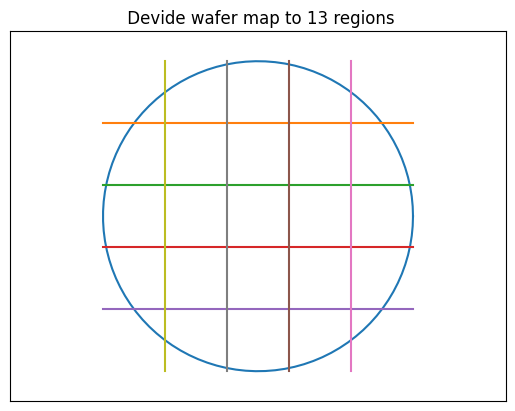

In [22]:
# illustration of 13 regions
an = np.linspace(0, 2*np.pi, 100)
plt.plot(2.5*np.cos(an), 2.5*np.sin(an))
plt.axis('equal')
plt.axis([-4, 4, -4, 4])
plt.plot([-2.5, 2.5], [1.5, 1.5])
plt.plot([-2.5, 2.5], [0.5, 0.5 ])
plt.plot([-2.5, 2.5], [-0.5, -0.5 ])
plt.plot([-2.5, 2.5], [-1.5,-1.5 ])

plt.plot([0.5, 0.5], [-2.5, 2.5])
plt.plot([1.5, 1.5], [-2.5, 2.5])
plt.plot([-0.5, -0.5], [-2.5, 2.5])
plt.plot([-1.5, -1.5], [-2.5, 2.5])
plt.title(" Devide wafer map to 13 regions")
plt.xticks([])
plt.yticks([])
plt.show()

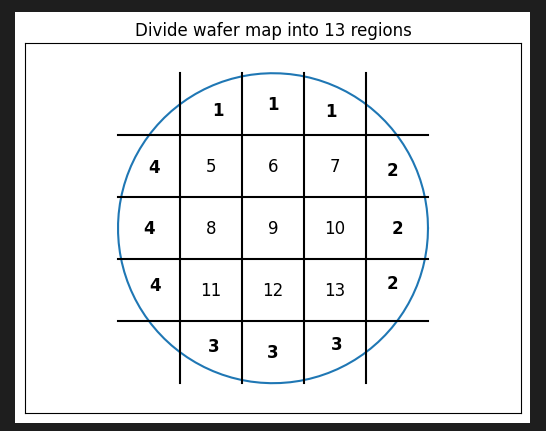

In [ ]:
def cal_den(x):
    wafer_area = (x == 1) | (x == 2)  # Wafer area includes pixels with values 1 and 2
    total_wafer_pixels = np.sum(wafer_area)
    defect_pixels = np.sum(x == 2)
    return 100 * (defect_pixels / total_wafer_pixels) if total_wafer_pixels > 0 else 0

def find_regions(x):
    if x.size == 0:
        return [0] * 13
    rows, cols = x.shape

    # Divide rows and cols into 6 equal parts (creates 6 indices)
    ind1 = np.linspace(0, rows, 6, dtype=int)
    ind2 = np.linspace(0, cols, 6, dtype=int)

    # Handle cases where rows or cols are less than expected
    if len(ind1) < 6 or len(ind2) < 6:
        return [0] * 13

    # Define inner grid regions (regions 5-13)
    reg5 = x[ind1[2]:ind1[3], ind2[1]:ind2[2]]   # Top-left square
    reg6 = x[ind1[2]:ind1[3], ind2[2]:ind2[3]]   # Top-middle square
    reg7 = x[ind1[2]:ind1[3], ind2[3]:ind2[4]]   # Top-right square
    reg8 = x[ind1[3]:ind1[4], ind2[1]:ind2[2]]   # Middle-left square
    reg9 = x[ind1[3]:ind1[4], ind2[2]:ind2[3]]   # Center square
    reg10 = x[ind1[3]:ind1[4], ind2[3]:ind2[4]]  # Middle-right square
    reg11 = x[ind1[4]:ind1[5], ind2[1]:ind2[2]]  # Bottom-left square
    reg12 = x[ind1[4]:ind1[5], ind2[2]:ind2[3]]  # Bottom-middle square
    reg13 = x[ind1[4]:ind1[5], ind2[3]:ind2[4]]  # Bottom-right square

    # Define outer regions
    # Region 1: Top band (above the inner grid)
    reg1 = x[ind1[0]:ind1[2], ind2[1]:ind2[4]]
    # Region 2: Right band (right of the inner grid)
    reg2 = x[ind1[2]:ind1[5], ind2[4]:ind2[5]]
    # Region 3: Bottom band (below the inner grid)
    reg3 = x[ind1[4]:ind1[5], ind2[1]:ind2[4]]  
    # Region 4: Left band (left of the inner grid)
    reg4 = x[ind1[2]:ind1[5], ind2[0]:ind2[1]]

    # Calculate densities for each region
    fea_reg_den = [
        cal_den(reg1), cal_den(reg2), cal_den(reg3), cal_den(reg4),
        cal_den(reg5), cal_den(reg6), cal_den(reg7), cal_den(reg8),
        cal_den(reg9), cal_den(reg10), cal_den(reg11), cal_den(reg12), cal_den(reg13)
    ]
    return fea_reg_den



In [24]:
# Create a new DataFrame with the filtered data
df_modified_labelled = df_modified[~df_modified['failure_class'].isin(['No pattern', 'No label'])].reset_index(drop=True)

In [25]:
print(df_modified_labelled['trainTestLabel'].value_counts())

trainTestLabel
Training    17625
Test         7894
Name: count, dtype: int64


In [26]:
df_modified_labelled['fea_reg'] = df_modified_labelled['waferMap'].apply(find_regions)

In [ ]:
from skimage.transform import radon
from skimage import measure
from scipy import stats
import ipywidgets as widgets

# Function to modify the wafer map images
def change_val(img):
    img = img.copy()
    img[img == 1] = 0  # Set non-defect pixels to 0
    return img

# Function to compute Radon-based features
def compute_radon_features(wafer_map, num_features=40):
    img = change_val(wafer_map)
    # Define theta values for the Radon Transform
    theta = np.linspace(0., 180., max(img.shape), endpoint=False)
    # Compute the Radon Transform (sinogram)
    sinogram = radon(img, theta=theta, circle=False)
    # Compute the mean across angles (mean of each row)
    row_mean = np.mean(sinogram, axis=1)
    # Interpolate the row_mean to a fixed length (num_features)
    x_original = np.linspace(0, len(row_mean) - 1, len(row_mean))
    x_interpolated = np.linspace(0, len(row_mean) - 1, num_features)
    features = np.interp(x_interpolated, x_original, row_mean)
    return features

# Function to calculate defect density in a region
def cal_den(x):
    wafer_area = (x == 1) | (x == 2)
    total_wafer_pixels = np.sum(wafer_area)
    defect_pixels = np.sum(x == 2)
    return 100 * (defect_pixels / total_wafer_pixels) if total_wafer_pixels > 0 else 0

# Function to find regions and calculate densities
def find_regions(x):
    if x.size == 0:
        return [0] * 13
    rows, cols = x.shape
    ind1 = np.linspace(0, rows, 6, dtype=int)
    ind2 = np.linspace(0, cols, 6, dtype=int)
    if len(ind1) < 6 or len(ind2) < 6:
        return [0] * 13

    # Define inner grid regions (regions 5-13)
    reg5 = x[ind1[2]:ind1[3], ind2[1]:ind2[2]]
    reg6 = x[ind1[2]:ind1[3], ind2[2]:ind2[3]]
    reg7 = x[ind1[2]:ind1[3], ind2[3]:ind2[4]]
    reg8 = x[ind1[3]:ind1[4], ind2[1]:ind2[2]]
    reg9 = x[ind1[3]:ind1[4], ind2[2]:ind2[3]]
    reg10 = x[ind1[3]:ind1[4], ind2[3]:ind2[4]]
    reg11 = x[ind1[4]:ind1[5], ind2[1]:ind2[2]]
    reg12 = x[ind1[4]:ind1[5], ind2[2]:ind2[3]]
    reg13 = x[ind1[4]:ind1[5], ind2[3]:ind2[4]]

    # Define outer regions
    reg1 = x[ind1[0]:ind1[2], ind2[1]:ind2[4]]
    reg2 = x[ind1[2]:ind1[5], ind2[4]:ind2[5]]
    reg3 = x[ind1[4]:ind1[5], ind2[1]:ind2[4]]
    reg4 = x[ind1[2]:ind1[5], ind2[0]:ind2[1]]

    # Calculate densities for each region
    fea_reg_den = [
        cal_den(reg1), cal_den(reg2), cal_den(reg3), cal_den(reg4),
        cal_den(reg5), cal_den(reg6), cal_den(reg7), cal_den(reg8),
        cal_den(reg9), cal_den(reg10), cal_den(reg11), cal_den(reg12), cal_den(reg13)
    ]
    return fea_reg_den

# Function to compute geometry-based features
def compute_geometry_features(wafer_map):
    # Preprocess the wafer map
    img = change_val(wafer_map)
    norm_area = img.shape[0] * img.shape[1]
    norm_perimeter = np.hypot(img.shape[0], img.shape[1])
    max_distance = np.hypot(img.shape[0]/2, img.shape[1]/2)

    # Create a binary image where defects are 1
    binary_img = (img == 2).astype(int)

    # Label connected regions
    labeled_img = measure.label(binary_img, connectivity=1)

    # If no defects are found, return zeros
    if labeled_img.max() == 0:
        return np.zeros(6)

    # Identify the most salient region (largest area)
    regions = measure.regionprops(labeled_img)
    salient_region = max(regions, key=lambda r: r.area)

    # Calculate normalized geometric features
    area = salient_region.area / norm_area
    perimeter = salient_region.perimeter / norm_perimeter

    # Calculate the centroid distance to the image center
    centroid = salient_region.centroid
    center_coords = (img.shape[0] / 2, img.shape[1] / 2)
    centroid_distance = np.hypot(centroid[0] - center_coords[0], centroid[1] - center_coords[1]) / max_distance

    major_axis_length = salient_region.major_axis_length / norm_perimeter
    minor_axis_length = salient_region.minor_axis_length / norm_perimeter
    eccentricity = salient_region.eccentricity

    # Return the features as an array
    features = np.array([
        area,
        perimeter,
        centroid_distance,
        major_axis_length,
        minor_axis_length,
        eccentricity
    ])

    return features


# Ensure 'new_waferMap' is in the DataFrame
if 'new_waferMap' not in df_modified_labelled.columns:
    df_modified_labelled['new_waferMap'] = df_modified_labelled['waferMap'].apply(change_val)

# Compute Radon-based features and store as tensors in a single column
df_modified_labelled['radon_features'] = df_modified_labelled['waferMap'].apply(compute_radon_features)

# Compute region densities (density-based features) - already correct
df_modified_labelled['fea_reg'] = df_modified_labelled['waferMap'].apply(find_regions)

# Compute geometry-based features and store as tensors in a single column
df_modified_labelled['geometry_features'] = df_modified_labelled['waferMap'].apply(compute_geometry_features)

# Create UI components
failure_types = df_modified_labelled['failureType'].unique()
failure_type_dropdown = widgets.Dropdown(
    options=failure_types,
    description='Failure Type:',
    disabled=False,
)
generate_button = widgets.Button(
    description='Generate Plots',
    disabled=False,
    button_style='success',
    tooltip='Click to generate plots for selected failure type',
    icon='check'
)
output = widgets.Output()

# Function to plot the wafer map
def plot_wafer_map(wafer_map, title='Wafer Map'):
    plt.imshow(wafer_map, cmap='viridis', interpolation='none')
    plt.title(title)
    plt.axis('off')

# Function to plot the Radon transform
def plot_radon_transform(wafer_map, title='Radon Transform'):
    img = change_val(wafer_map)
    theta = np.linspace(0., 180., max(img.shape), endpoint=False)
    sinogram = radon(img, theta=theta, circle=False)
    plt.imshow(sinogram, cmap='gray',
               extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')
    plt.title(title)
    plt.xlabel('Projection angle (degrees)')
    plt.ylabel('Projection position (pixels)')
    plt.colorbar(label='Intensity')

# Function to plot Radon-based features
def plot_radon_features(features, title='Radon-based Features'):
    plt.plot(features)
    plt.title(title)
    plt.xlabel('Feature Index')
    plt.ylabel('Value')

# Function to plot region density
def plot_region_density(fea_reg_den, title='Region Density'):
    regions = np.arange(1, 14)  # Regions 1 to 13
    plt.bar(regions, fea_reg_den)
    plt.xlabel('Region')
    plt.ylabel('Density (%)')
    plt.title(title)
    plt.xticks(regions)
    plt.ylim(0, 100)

# Function to plot the most salient region
def plot_salient_region(wafer_map, title='Salient Region'):
    img = change_val(wafer_map)
    binary_img = (img == 2).astype(int)

    labeled_img = measure.label(binary_img, connectivity=1)

    if labeled_img.max() == 0:
        plt.imshow(np.zeros_like(img), cmap='gray')
        plt.title(title)
        plt.axis('off')
        return

    # Identify the most salient region (largest area)
    regions = measure.regionprops(labeled_img)
    salient_region = max(regions, key=lambda r: r.area)

    # Create an image highlighting the most salient region
    salient_region_img = np.zeros_like(img)
    salient_region_img[labeled_img == salient_region.label] = 1

    plt.imshow(salient_region_img, cmap='viridis', interpolation='none')
    plt.title(title)
    plt.axis('off')

# Function to plot geometry-based features
def plot_geometry_features(features, title='Geometry Features'):
    feature_names = ['Area', 'Perimeter', 'Centroid Dist.', 'Major Axis', 'Minor Axis', 'Eccentricity']
    y_pos = np.arange(len(feature_names))
    plt.barh(y_pos, features, align='center')
    plt.yticks(y_pos, feature_names)
    plt.xlabel('Normalized Value')
    plt.title(title)

# Event handler for the button click
def on_generate_button_clicked(b):
    with output:
        clear_output(wait=True)
        selected_failure_type = failure_type_dropdown.value

        # Filter DataFrame
        df_filtered = df_modified_labelled[df_modified_labelled['failureType'] == selected_failure_type]

        # Check for sufficient samples
        num_samples = min(len(df_filtered), 20)
        if num_samples == 0:
            print(f"No samples found for failure type '{selected_failure_type}'.")
            return

        random_samples = df_filtered.sample(n=num_samples, random_state=42).reset_index(drop=True)

        for i in range(num_samples):
            fig, axs = plt.subplots(1, 6, figsize=(24, 4))

            # Sample data
            wafer_map = random_samples.loc[i, 'waferMap']
            features = random_samples.loc[i, 'radon_features']
            fea_reg_den = random_samples.loc[i, 'fea_reg']
            geometry = random_samples.loc[i, 'geometry_features']

            # Plot wafer map
            plt.sca(axs[0])
            plot_wafer_map(wafer_map, title=f'Sample {i+1} Wafer Map')

            # Plot Radon transform
            plt.sca(axs[1])
            plot_radon_transform(wafer_map, title='Radon Transform')

            # Plot Radon-based features
            plt.sca(axs[2])
            plot_radon_features(features, title='Radon Features')

            # Plot Region Density
            plt.sca(axs[3])
            plot_region_density(fea_reg_den, title='Region Density')

            # Plot Salient Region
            plt.sca(axs[4])
            plot_salient_region(wafer_map, title='Salient Region')

            # Plot Geometry Features
            plt.sca(axs[5])
            plot_geometry_features(geometry, title='Geometry Features')

            plt.tight_layout()
            plt.show()

# Create UI components
failure_types = df_modified_labelled['failureType'].unique()
failure_type_dropdown = widgets.Dropdown(
    options=failure_types,
    description='Failure Type:',
    disabled=False,
)
generate_button = widgets.Button(
    description='Generate Plots',
    disabled=False,
    button_style='success',
    tooltip='Click to generate plots for selected failure type',
    icon='check'
)
# New button to generate one sample per failure type
generate_all_button = widgets.Button(
    description='Generate All Failure Types',
    disabled=False,
    button_style='info',
    tooltip='Click to generate plots for one sample per failure type',
    icon='check'
)
output = widgets.Output()

# Event handler for the new button
def on_generate_all_button_clicked(b):
    with output:
        clear_output(wait=True)
        
        # Get all unique failure types
        failure_types_list = df_modified_labelled['failureType'].unique()
        
        samples_list = []
        for failure_type in failure_types_list:
            df_filtered = df_modified_labelled[df_modified_labelled['failureType'] == failure_type]
            if len(df_filtered) == 0:
                continue  # No samples for this failure type
            # Randomly select one sample
            sample = df_filtered.sample(n=1, random_state=42)
            samples_list.append(sample)
        
        # Concatenate all samples into a single DataFrame
        all_samples = pd.concat(samples_list).reset_index(drop=True)
        
        # Loop through the samples and generate plots
        num_samples = len(all_samples)
        for i in range(num_samples):
            fig, axs = plt.subplots(1, 6, figsize=(24, 4))
            
            # Sample data
            wafer_map = all_samples.loc[i, 'waferMap']
            features = all_samples.loc[i, 'radon_features']
            fea_reg_den = all_samples.loc[i, 'fea_reg']
            geometry = all_samples.loc[i, 'geometry_features']
            failure_type = all_samples.loc[i, 'failureType']
            
            # Plot wafer map
            plt.sca(axs[0])
            plot_wafer_map(wafer_map, title=f'Wafer Map ({failure_type})')
            
            # Plot Radon transform
            plt.sca(axs[1])
            plot_radon_transform(wafer_map, title='Radon Transform')
            
            # Plot Radon-based features
            plt.sca(axs[2])
            plot_radon_features(features, title='Radon Features')
            
            # Plot Region Density
            plt.sca(axs[3])
            plot_region_density(fea_reg_den, title='Region Density')
            
            # Plot Salient Region
            plt.sca(axs[4])
            plot_salient_region(wafer_map, title='Salient Region')
            
            # Plot Geometry Features
            plt.sca(axs[5])
            plot_geometry_features(geometry, title='Geometry Features')
            
            plt.tight_layout()
            plt.show()

# Attach event handlers to the buttons
generate_button.on_click(on_generate_button_clicked)
generate_all_button.on_click(on_generate_all_button_clicked)

# Display the UI components
buttons = widgets.HBox([generate_button, generate_all_button])
display(failure_type_dropdown, buttons, output)


Dropdown(description='Failure Type:', options=('Loc', 'Edge-Loc', 'Center', 'Edge-Ring', 'Scratch', 'Random', …

Output()

In [29]:
df_modified_labelled

,dieSize,failureType,lotName,trainTestLabel,waferIndex,waferMap,waferMapDim,failure_class,fea_reg,new_waferMap,radon_features,geometry_features
0,1683.0,Loc,lot1,Training,20.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","(45, 48)",Labeled with pattern,"[9.574468085106384, 14.117647058823529, 4.4843...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.000315313607191676...","[0.027314814814814816, 0.5954493227790636, 0.4..."
1,2460.0,Edge-Loc,lot2,Training,12.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","(53, 58)",Labeled with pattern,"[7.142857142857142, 19.12350597609562, 8.33333...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.000274950693590334...","[0.01626545217957059, 0.42137276857016587, 0.6..."
2,2460.0,Edge-Loc,lot2,Training,13.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","(53, 58)",Labeled with pattern,"[7.580174927113703, 16.334661354581673, 8.6309...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.000401245217059437...","[0.019193233571893297, 0.4595560383749584, 0.6..."
3,2460.0,Edge-Loc,lot2,Training,14.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","(53, 58)",Labeled with pattern,"[8.017492711370263, 22.709163346613543, 7.1428...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.000388971299170305...","[0.025374105400130124, 0.49864384199138284, 0...."
4,2460.0,Edge-Loc,lot2,Training,15.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","(53, 58)",Labeled with pattern,"[11.807580174927114, 15.139442231075698, 8.333...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.000253375174018684...","[0.019843851659076123, 0.506551856095831, 0.67..."
...,...,...,...,...,...,...,...,...,...,...,...,...
25514,600.0,Edge-Loc,lot47542,Test,21.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...","(26, 30)",Labeled with pattern,"[7.361963190184049, 46.55172413793103, 20.8791...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.000261966069246586...","[0.03076923076923077, 0.5394162468538333, 0.61..."
25515,600.0,Edge-Loc,lot47542,Test,22.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...","(26, 30)",Labeled with pattern,"[2.4539877300613497, 29.310344827586203, 8.791...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.0, 0.0, 0.0, 0.0, 1.9627380949500074e-05, 0...","[0.019230769230769232, 0.35787184975239533, 0...."
25516,600.0,Edge-Ring,lot47542,Test,23.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...","(26, 30)",Labeled with pattern,"[4.294478527607362, 36.206896551724135, 21.978...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,...","[0.0, 0.0, 0.0, 0.0, 1.9627380949500074e-05, 0...","[0.017948717948717947, 0.30749257756640747, 0...."
25517,600.0,Edge-Loc,lot47542,Test,24.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...","(26, 30)",Labeled with pattern,"[3.6809815950920246, 50.0, 21.978021978021978,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.000261966069246586...","[0.05, 0.8434820522885769, 0.5859711041082444,..."


In [30]:
# The sizes for the first sample in the DataFrame
sample_index = 0  # Change this index to check other samples

# Retrieve the features from the DataFrame
fea_reg = df_modified_labelled.loc[sample_index, 'fea_reg']
radon_features = df_modified_labelled.loc[sample_index, 'radon_features']
geometry_features = df_modified_labelled.loc[sample_index, 'geometry_features']

# Print the sizes
print(f"Size of fea_reg (density-based features): {len(fea_reg)}")
print(f"Size of radon_features (Radon-based features): {len(radon_features)}")
print(f"Size of geometry_features (Geometry-based features): {len(geometry_features)}")

Size of fea_reg (density-based features): 13
Size of radon_features (Radon-based features): 40
Size of geometry_features (Geometry-based features): 6


Training Accuracy: 0.96
Test Accuracy: 0.74
Training Classification Report:
              precision    recall  f1-score   support

      Center       0.98      1.00      0.99      3462
       Donut       0.97      0.94      0.96       409
    Edge-Loc       0.86      0.94      0.90      2417
   Edge-Ring       0.99      0.98      0.98      8554
         Loc       0.93      0.85      0.89      1620
   Near-full       1.00      0.98      0.99        54
      Random       0.99      0.97      0.98       609
     Scratch       0.84      0.75      0.79       500

    accuracy                           0.96     17625
   macro avg       0.95      0.93      0.94     17625
weighted avg       0.96      0.96      0.96     17625

Test Classification Report:
              precision    recall  f1-score   support

      Center       0.81      0.92      0.86       832
       Donut       0.80      0.52      0.63       146
    Edge-Loc       0.66      0.90      0.76      2772
   Edge-Ring       0.84     

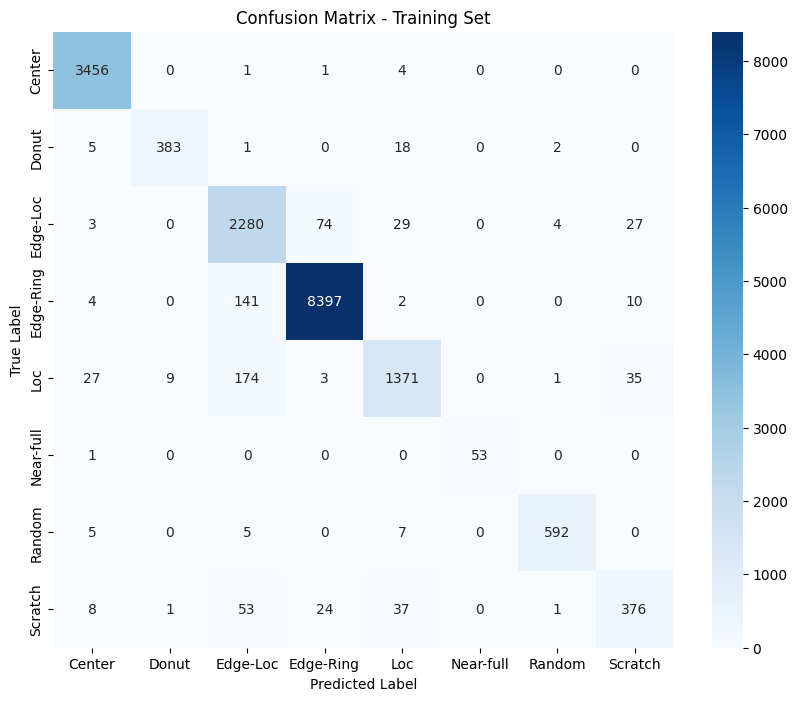

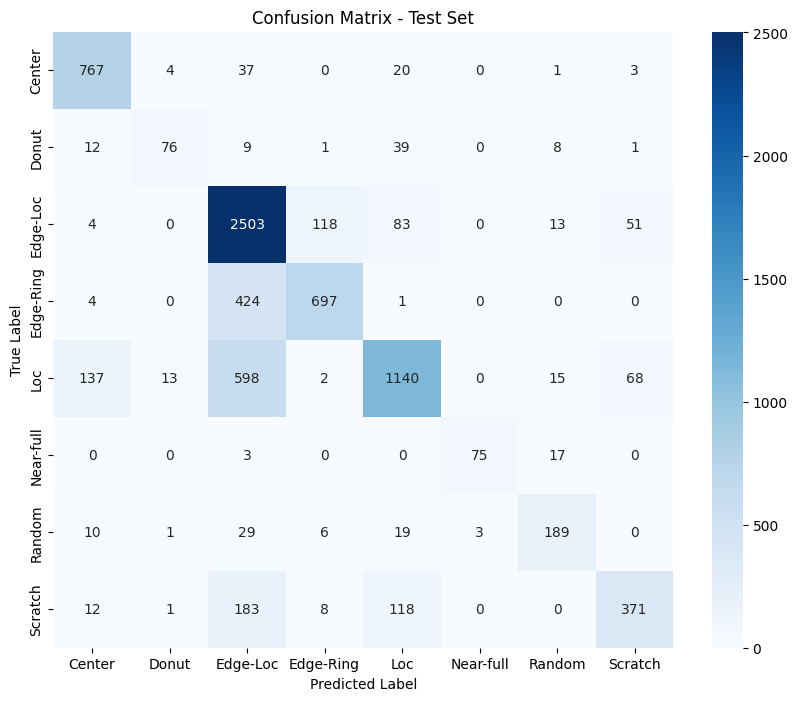

In [31]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Function to combine features into a single feature vector
def combine_features(row):
    # Concatenate the features
    features = np.concatenate([
        np.array(row['fea_reg']),           # Density-based features (13)
        np.array(row['radon_features']),    # Radon-based features (40)
        np.array(row['geometry_features'])  # Geometry-based features (6)
    ])
    return features

# Apply the function to create a new column with the combined features
df_modified_labelled['combined_features'] = df_modified_labelled.apply(combine_features, axis=1)

# Extract the combined features into a NumPy array
X = np.array(df_modified_labelled['combined_features'].tolist())

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_modified_labelled['failureType'])

# Split the data based on 'trainTestLabel'
train_indices = df_modified_labelled['trainTestLabel'] == 'Training'
test_indices = df_modified_labelled['trainTestLabel'] == 'Test'

X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the SVM classifier with One-Vs-One strategy
svm_classifier = svm.SVC(decision_function_shape='ovo', kernel='rbf', gamma='scale')

# Train the classifier
svm_classifier.fit(X_train_scaled, y_train)

# Predict the labels of the training set
y_train_pred = svm_classifier.predict(X_train_scaled)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Predict the labels of the test set
y_test_pred = svm_classifier.predict(X_test_scaled)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Get the class names from the label encoder
class_names = label_encoder.classes_

# Classification report for training set
train_report = classification_report(y_train, y_train_pred, target_names=class_names)
print("Training Classification Report:")
print(train_report)

# Classification report for test set
test_report = classification_report(y_test, y_test_pred, target_names=class_names)
print("Test Classification Report:")
print(test_report)

# Compute confusion matrix for training set
cm_train = confusion_matrix(y_train, y_train_pred)

# Plot confusion matrix for training set
plt.figure(figsize=(10, 8))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Compute confusion matrix for test set
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for test set
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
